# Dogs vs Cats Redux

First we need to create a directory structure and get a small sample of training and validation data using bash makeDirStruct.sh

In [1]:
import os
cwd = os.getcwd()

main_path = cwd + "\\data\\dogscats\\"
data_path = cwd + "\\data\\dogscats\\sample\\"
#data_path = "data/dogscats/"
test_path = data_path + "test\\"

In [2]:
main_path = cwd + "/data/dogscats/"
#data_path = "data/dogscats/sample/"
data_path = "data/dogscats/"
test_path = data_path + "test/"

Load utils and initialize custom Tensorflow session for Keras

In [3]:
%matplotlib inline
from imp import reload
import utils; reload(utils)
from utils import *

Using TensorFlow backend.


In [4]:
!nvidia-smi

Thu Aug 17 05:32:30 2017       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 367.48                 Driver Version: 367.48                    |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | E486:00:00.0     Off |                    0 |
| N/A   40C    P0    71W / 149W |     64MiB / 11439MiB |      1%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

In [5]:
batch_size=100

# Finetune and train

In [6]:
import vgg16; reload(vgg16)
from vgg16 import Vgg16

In [7]:
vgg = Vgg16()

/home/marozet/courses/deeplearning1/nbs/vgg16.py:105: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu")`
  model.add(Convolution2D(filters, 3, 3, activation='relu'))
/home/marozet/courses/deeplearning1/nbs/vgg16.py:105: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (3, 3), activation="relu")`
  model.add(Convolution2D(filters, 3, 3, activation='relu'))
/home/marozet/courses/deeplearning1/nbs/vgg16.py:105: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(256, (3, 3), activation="relu")`
  model.add(Convolution2D(filters, 3, 3, activation='relu'))
/home/marozet/courses/deeplearning1/nbs/vgg16.py:105: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(512, (3, 3), activation="relu")`
  model.add(Convolution2D(filters, 3, 3, activation='relu'))


In [8]:
batches = vgg.get_batches(data_path+'train',batch_size=batch_size)
val_batches = vgg.get_batches(data_path+'valid', batch_size=batch_size)
vgg.finetune(batches)

Found 23000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


vgg.model.load_weights(main_path+'results/ft01.h5')

In [9]:
batches_per_epoch_div = 1
epochs_to_run=1

In [10]:
vgg.model.optimizer.lr=0.001
vgg.fit(batches,val_batches,nb_epoch=epochs_to_run,steps_per_epoch=(batches.samples // batch_size) // batches_per_epoch_div, validation_steps=val_batches.samples // batch_size)

/home/marozet/courses/deeplearning1/nbs/vgg16.py:218: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  validation_data=val_batches, validation_steps=validation_steps)
/home/marozet/courses/deeplearning1/nbs/vgg16.py:218: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras.pre..., steps_per_epoch=230, epochs=1, validation_data=<keras.pre..., validation_steps=20)`
  validation_data=val_batches, validation_steps=validation_steps)


Epoch 1/1
230/230 [==============================] - 520s - loss: 0.4230 - acc: 0.8707 - val_loss: 0.2523 - val_acc: 0.9140

The computation is run on NVIDIA Tesla K80 with around 11GB RAM. As seen below Tensorflow session keeps the memory allocation.

In [11]:
!nvidia-smi

Thu Aug 17 05:41:14 2017       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 367.48                 Driver Version: 367.48                    |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | E486:00:00.0     Off |                    0 |
| N/A   67C    P0    76W / 149W |   9477MiB / 11439MiB |    100%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

In [12]:
vgg.model.save_weights(main_path+'results/ft01.h5')

In [13]:
vgg.model.optimizer.lr=0.0003
vgg.fit(batches,val_batches,nb_epoch=epochs_to_run,steps_per_epoch=(batches.samples // batch_size) // batches_per_epoch_div, validation_steps=val_batches.samples // batch_size)
vgg.model.save_weights(main_path+'results/ft02.h5')

/home/marozet/courses/deeplearning1/nbs/vgg16.py:218: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  validation_data=val_batches, validation_steps=validation_steps)
/home/marozet/courses/deeplearning1/nbs/vgg16.py:218: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras.pre..., steps_per_epoch=230, epochs=1, validation_data=<keras.pre..., validation_steps=20)`
  validation_data=val_batches, validation_steps=validation_steps)


Epoch 1/1
230/230 [==============================] - 513s - loss: 0.3254 - acc: 0.8934 - val_loss: 0.2333 - val_acc: 0.9205

In [14]:
vgg.model.optimizer.lr = 0.0001

In [15]:
vgg.fit(batches,val_batches,nb_epoch=epochs_to_run,steps_per_epoch=(batches.samples // batch_size) // batches_per_epoch_div, validation_steps=val_batches.samples // batch_size)
vgg.model.save_weights(main_path+'results/ft03.h5')

/home/marozet/courses/deeplearning1/nbs/vgg16.py:218: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  validation_data=val_batches, validation_steps=validation_steps)
/home/marozet/courses/deeplearning1/nbs/vgg16.py:218: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras.pre..., steps_per_epoch=230, epochs=1, validation_data=<keras.pre..., validation_steps=20)`
  validation_data=val_batches, validation_steps=validation_steps)


Epoch 1/1
230/230 [==============================] - 512s - loss: 0.3014 - acc: 0.8967 - val_loss: 0.2280 - val_acc: 0.9220

In [16]:
vgg.model.optimizer.lr = 0.00003
vgg.fit(batches,val_batches,nb_epoch=epochs_to_run,steps_per_epoch=(batches.samples // batch_size) // batches_per_epoch_div, validation_steps=val_batches.samples // batch_size)
vgg.model.save_weights(main_path+'results/ft04.h5')

/home/marozet/courses/deeplearning1/nbs/vgg16.py:218: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  validation_data=val_batches, validation_steps=validation_steps)
/home/marozet/courses/deeplearning1/nbs/vgg16.py:218: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras.pre..., steps_per_epoch=230, epochs=1, validation_data=<keras.pre..., validation_steps=20)`
  validation_data=val_batches, validation_steps=validation_steps)


Epoch 1/1
230/230 [==============================] - 513s - loss: 0.2985 - acc: 0.8998 - val_loss: 0.2092 - val_acc: 0.9215

In [17]:
vgg.model.optimizer.lr = 0.000001
vgg.fit(batches,val_batches,nb_epoch=epochs_to_run,steps_per_epoch=(batches.samples // batch_size) // batches_per_epoch_div, validation_steps=val_batches.samples // batch_size)
vgg.model.save_weights(main_path+'results/ft05.h5')

/home/marozet/courses/deeplearning1/nbs/vgg16.py:218: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  validation_data=val_batches, validation_steps=validation_steps)
/home/marozet/courses/deeplearning1/nbs/vgg16.py:218: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras.pre..., steps_per_epoch=230, epochs=1, validation_data=<keras.pre..., validation_steps=20)`
  validation_data=val_batches, validation_steps=validation_steps)


Epoch 1/1
230/230 [==============================] - 513s - loss: 0.2968 - acc: 0.9009 - val_loss: 0.2170 - val_acc: 0.9215

#Windows version
vgg.model.load_weights(main_path+'results\\ft05.h5')

In [18]:
test_batches = vgg.get_batches(test_path,shuffle=False,batch_size=batch_size,class_mode=None)
print(test_batches.samples)

Found 12500 images belonging to 1 classes.
12500


In [19]:
prediction = vgg.model.predict_generator(test_batches, steps = test_batches.samples // (batch_size), verbose=1)

125/125 [==============================] - 256s     

In [20]:
filenames = test_batches.filenames
print(len(filenames))

12500


In [21]:
print(prediction.shape)
print(prediction[:5])
prediction_trim = prediction[:len(filenames)]
print(prediction_trim.shape)

(12500, 2)
[[  9.7391e-01   2.6090e-02]
 [  3.3151e-02   9.6685e-01]
 [  9.9999e-01   1.1542e-05]
 [  6.9818e-04   9.9930e-01]
 [  6.3025e-03   9.9370e-01]]
(12500, 2)


In [40]:
prediction_clip = np.clip(prediction_trim,0.02,0.98)
prediction_clip[:5]

array([[ 0.9739,  0.0261],
       [ 0.0332,  0.9668],
       [ 0.98  ,  0.02  ],
       [ 0.02  ,  0.98  ],
       [ 0.02  ,  0.98  ]], dtype=float32)

In [41]:
filenames[:5]

['unknown/1164.jpg',
 'unknown/9896.jpg',
 'unknown/2934.jpg',
 'unknown/6651.jpg',
 'unknown/7220.jpg']

In [42]:
#Windows version
#from PIL import Image
#Image.open(test_path.replace("/","\\")+filenames[0])

unknown/1164.jpg


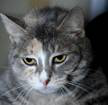

In [43]:
from PIL import Image
#print(prediction[0])
print(filenames[0])
Image.open(test_path+filenames[0])

In [44]:
isdog = prediction_clip[:,1]
isdog[:5]

array([ 0.0261,  0.9668,  0.02  ,  0.98  ,  0.98  ], dtype=float32)

In [45]:
import re
pattern = re.compile('\d+')
ids = [pattern.search(x).group() for x in filenames]
ids[-5:]


['2590', '9072', '3998', '6456', '137']

In [46]:
print(len(ids))
print(len(isdog))

12500
12500


         label
id            
1164  0.026090
9896  0.966849
2934  0.020000
6651  0.980000
7220  0.980000


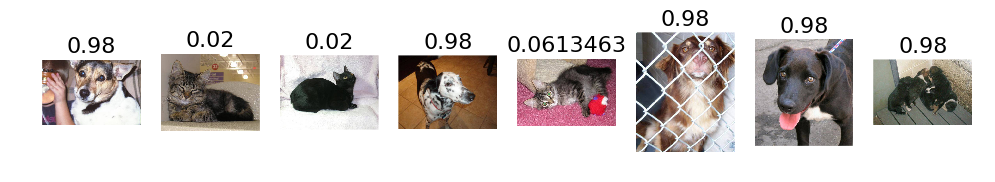

In [47]:
def plot_idx(idx, titles=None):
    plots([image.load_img(data_path + 'test/' + i) for i in idx], titles=titles)
n_view=8

df = pd.DataFrame({'id':ids,'label':isdog})
df['id'] = df['id'].astype(int)
df = df.set_index('id')
print(df.head())
f_names = permutation(filenames)[:n_view]
idx = [pattern.search(x).group() for x in f_names]
plot_idx(f_names,list(df.loc[np.array(idx).astype(int),'label']))


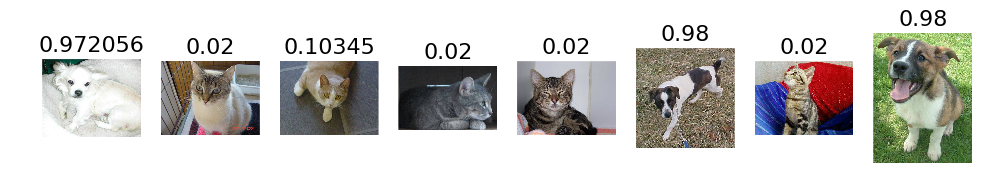

In [48]:
f_names = permutation(filenames)[:n_view]
idx = [pattern.search(x).group() for x in f_names]
plot_idx(f_names,list(df.loc[np.array(idx).astype(int),'label']))

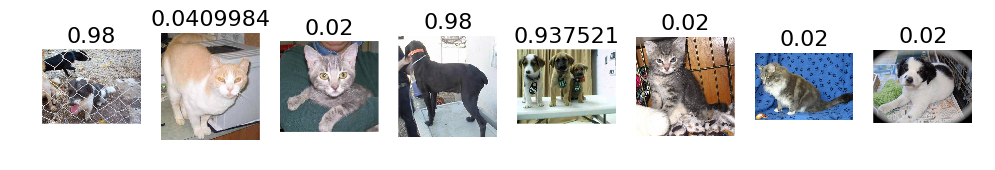

In [49]:
f_names = permutation(filenames)[:n_view]
idx = [pattern.search(x).group() for x in f_names]
plot_idx(f_names,list(df.loc[np.array(idx).astype(int),'label']))

In [50]:
type(df.index[0])

numpy.int64

In [51]:
import pandas as pd
subm_df = pd.DataFrame({'id':ids,'label':isdog})
subm_df.head()

,id,label
0,1164,0.026090
1,9896,0.966849
2,2934,0.020000
3,6651,0.980000
4,7220,0.980000


In [52]:
subm_df.tail()

,id,label
12495,2590,0.980000
12496,9072,0.676954
12497,3998,0.980000
12498,6456,0.020000
12499,137,0.980000


In [53]:
subm_df['id'] = subm_df['id'].astype(int)
subm_df['label'] = np.round(subm_df['label'],5)
print(subm_df.info())
print(subm_df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12500 entries, 0 to 12499
Data columns (total 2 columns):
id       12500 non-null int64
label    12500 non-null float32
dtypes: float32(1), int64(1)
memory usage: 146.6 KB
None
     id    label
0  1164  0.02609
1  9896  0.96685
2  2934  0.02000
3  6651  0.98000
4  7220  0.98000


In [54]:
subm_df.to_csv(main_path + 'results/' + 'subm011.csv',index=False, float_format='%.5f')

In [55]:
from IPython.display import FileLink
FileLink('data/dogscats/results/' + 'subm011.csv')

/home/marozet/courses/deeplearning1/nbs/data/dogscats/results/subm011.csv

In [39]:
subm_df = pd.read_csv(main_path + 'results/' + 'subm002.csv')
print(subm_df.info())
subm_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12500 entries, 0 to 12499
Data columns (total 2 columns):
id       12500 non-null int64
label    12500 non-null float64
dtypes: float64(1), int64(1)
memory usage: 195.4 KB
None


,id,label
0,1164,0.025000
1,9896,0.025000
2,2934,0.933046
3,6651,0.975000
4,7220,0.975000


In [41]:
subm_df.loc[:,'label'] = 1 - subm_df['label']
#subm_df.columns = ['iid','label']
subm_df.loc[:,'label'] = np.round(subm_df['label'],5)
subm_df.sort_values('id',inplace=True)
subm_df.head()

,id,label
1468,1,0.97500
11340,2,0.02500
3512,3,0.03158
2967,4,0.02500
453,5,0.93526


In [42]:
subm_df.to_csv(main_path + 'results/' + 'subm005.csv',index=False)

In [43]:
from IPython.display import FileLink
FileLink('data/dogscats/results/' + 'subm005.csv')

/home/marozet/courses/deeplearning1/nbs/data/dogscats/results/subm005.csv

# Visualize results

In [56]:
vgg.model.load_weights(main_path+'results/ft04.h5')
batch_size=100
val_batches2 = vgg.get_batches(data_path+'valid', shuffle=False, batch_size=batch_size, class_mode=None)
val_probs = vgg.model.predict_generator(val_batches2, steps = val_batches2.samples // (batch_size),verbose=1)

Found 2000 images belonging to 2 classes.
20/20 [==============================] - 41s     

In [57]:
val_labels = val_batches2.classes
val_filenames = val_batches2.filenames

In [58]:
val_isCat_probs = val_probs[:,0]
val_preds = np.round(1-val_isCat_probs)
val_isCat_probs[:5]

array([ 0.9999,  0.6744,  1.    ,  1.    ,  0.8763], dtype=float32)

In [59]:
val_preds[:5]

array([ 0.,  0.,  0.,  0.,  0.], dtype=float32)

In [60]:
#Number of images to check
n_view = 4

Helped function for plotting images and probabilities

In [61]:
def plot_idx(idx, titles=None):
    plots([image.load_img(data_path + 'valid/' + val_filenames[i]) for i in idx], titles=titles)

Plot correct predictions

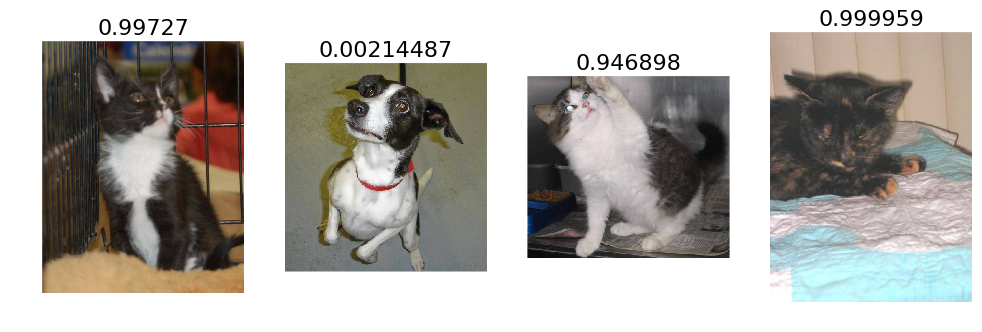

In [62]:
correct = np.where(val_preds == val_labels)[0]
idx = permutation(correct)[:n_view]
plot_idx(idx,val_isCat_probs[idx])

Plot a few incorrect predictions

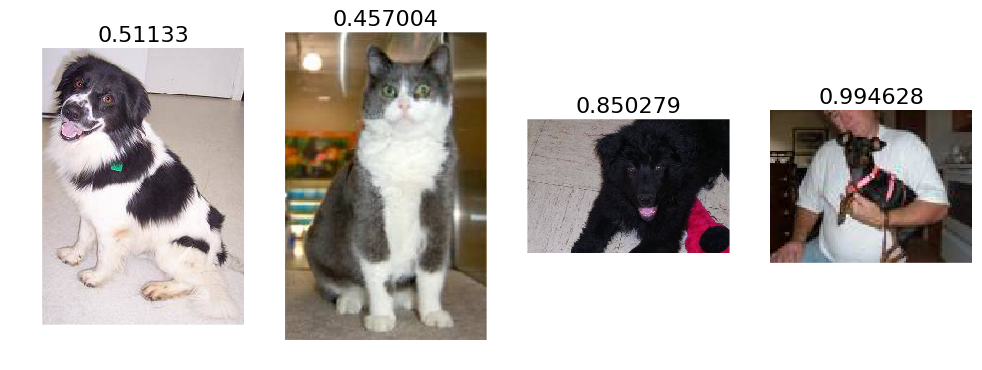

In [63]:
incorrect = np.where(val_preds != val_labels)[0]
idx = permutation(incorrect)[:n_view]
plot_idx(idx,val_isCat_probs[idx])

Plot confident predictions for cats

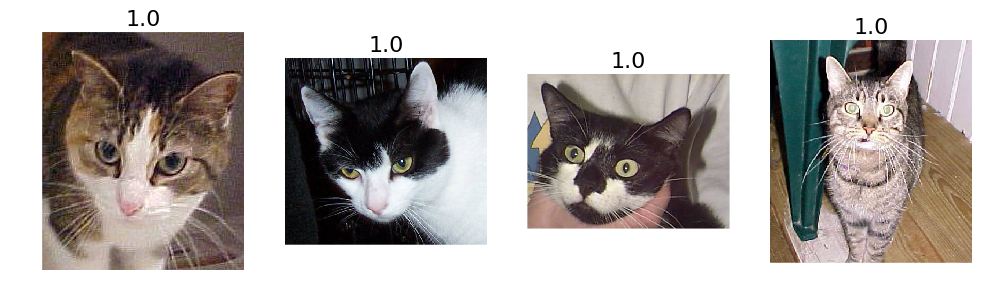

In [64]:
correct_cats = np.where((val_preds==0) & (val_preds==val_labels))[0]
most_correct_cats = np.argsort(val_isCat_probs[correct_cats])[-n_view:]
plot_idx(correct_cats[most_correct_cats], val_isCat_probs[correct_cats][most_correct_cats])

Plot confident predictions for dogs

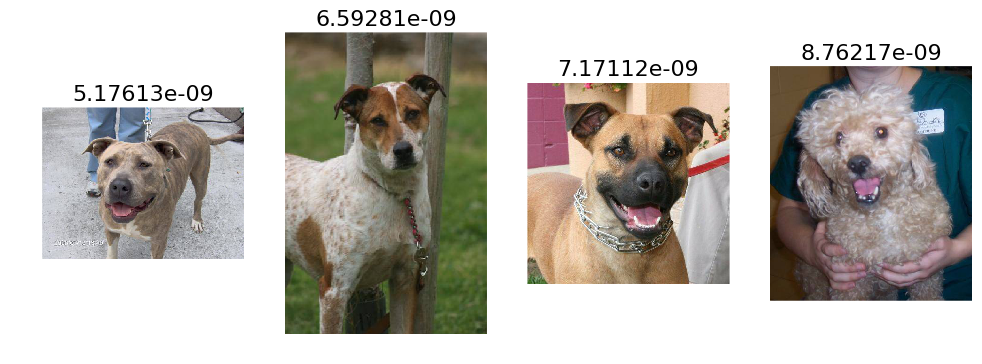

In [65]:
correct_dogs = np.where((val_preds==1) & (val_preds==val_labels))[0]
most_correct_dogs = np.argsort(val_isCat_probs[correct_dogs])[:n_view]
plot_idx(correct_dogs[most_correct_dogs], val_isCat_probs[correct_dogs][most_correct_dogs])

Plot incorrectly predicted cats

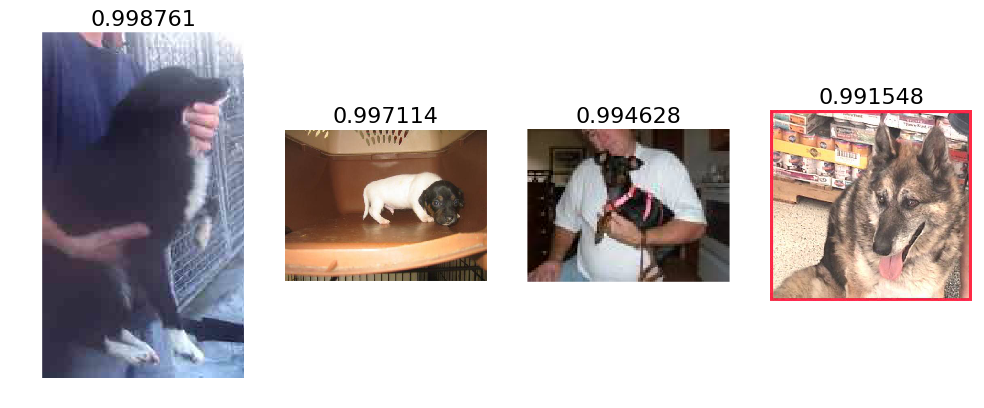

In [66]:
incorrect_cats = np.where((val_preds==0) & (val_preds != val_labels))[0]
most_incorrect_cats = np.argsort(val_isCat_probs[incorrect_cats])[::-1][:n_view]
plot_idx(incorrect_cats[most_incorrect_cats], val_isCat_probs[incorrect_cats][most_incorrect_cats])

Plot incorrectly predicted dogs

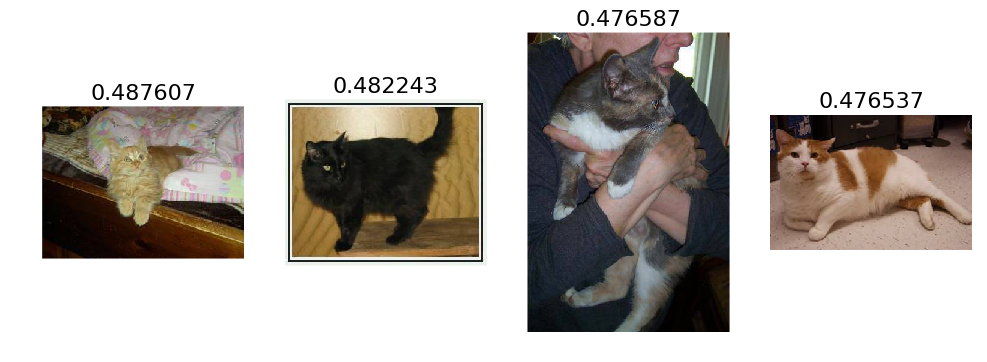

In [67]:
incorrect_dogs = np.where((val_preds==1) & (val_preds != val_labels))[0]
most_incorrect_dogs = np.argsort(val_isCat_probs[incorrect_dogs])[::-1][:n_view]
plot_idx(incorrect_dogs[most_incorrect_dogs], val_isCat_probs[incorrect_dogs][most_incorrect_dogs])

Plot the most uncertain predictions

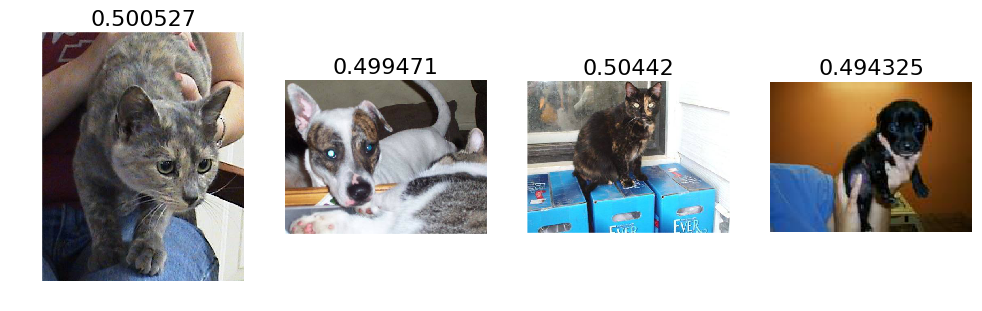

In [68]:
most_uncertain = np.argsort(np.abs(val_isCat_probs-0.5))
plot_idx(most_uncertain[:n_view], val_isCat_probs[most_uncertain][:n_view])

[[912  88]
 [ 65 935]]


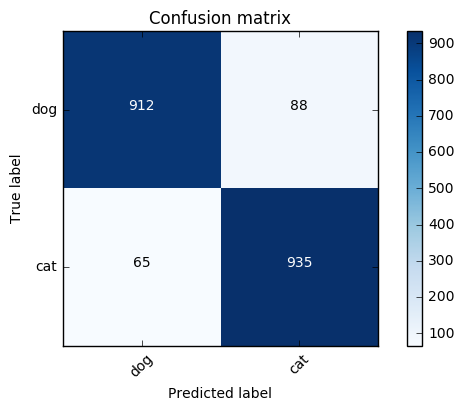

In [69]:
from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(val_labels,val_preds)
plot_confusion_matrix(cm, val_batches2.class_indices)

In [70]:
from sklearn.metrics import classification_report
print(classification_report(val_labels,val_preds))

             precision    recall  f1-score   support

          0       0.93      0.91      0.92      1000
          1       0.91      0.94      0.92      1000

avg / total       0.92      0.92      0.92      2000

